<a href="https://colab.research.google.com/github/paras9o9/Lead-Scoring-Predictor/blob/main/notebooks/Lead_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import joblib

# import streamlit as st

In [ ]:
df = pd.read_csv('/content/Lead Scoring.csv')
print(f"Shape: {df.shape}")
df.head()

Shape: (9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
df['Converted'].value_counts(normalize=True)

,proportion
Converted,
0,0.61461
1,0.38539


In [ ]:
df.drop(['Lead Number', 'Prospect ID'], axis=1, inplace=True, errors='ignore')

In [ ]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

,0
Lead Quality,51.590909
Asymmetrique Activity Index,45.649351
Asymmetrique Activity Score,45.649351
Asymmetrique Profile Score,45.649351
Asymmetrique Profile Index,45.649351
Tags,36.287879
What matters most to you in choosing a course,29.318182
Lead Profile,29.318182
What is your current occupation,29.112554
Country,26.634199


In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,5,21,2,2,NaN,NaN,NaN,NaN,17,38,...,1,6,7,3,3,NaN,NaN,1,2,16
top,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [ ]:
df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace=True)
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace=True)

/tmp/ipython-input-2692517655.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace=True)
/tmp/ipython-input-2692517655.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
df = df.replace('Select', np.nan)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  df[col].fillna('Unknown', inplace=True)

In [ ]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,-0.713593,-0.892982,-1.098699,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
1,0,0,0,0.324018,0.344133,0.066441,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,0,1,-0.298549,1.918977,-0.166587,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,0,0,-0.506071,-0.333160,-0.632643,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
4,0,0,1,-0.298549,1.728087,-0.632643,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 186 entries, Do Not Email to Last Notable Activity_View in browser link Clicked
dtypes: bool(168), float64(3), int64(15)
memory usage: 2.7 MB


,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9.240000e+03,9240.000000,9.240000e+03,9240.000000,9240.0,9240.000000,9240.000000,...,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9239,9226,5833,9057,8922,9239,7068,9208,9193,9239
mean,0.079437,0.000216,0.385390,3.998725e-17,-0.000004,-8.997132e-17,0.001515,0.0,0.000216,0.000108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.270435,0.014711,0.486714,1.000054e+00,1.000043,1.000054e+00,0.038898,0.0,0.014711,0.010403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,-7.135932e-01,-0.892982,-1.098699e+00,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,-5.060710e-01,-0.870956,-6.326433e-01,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,0.000000,0.000000,-9.102676e-02,-0.437782,-1.665873e-01,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,0.000000,1.000000,3.240175e-01,0.825029,2.994687e-01,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
useless_cols = [col for col in df.columns if df[col].nunique() == 1]

print("Dropping useless columns:", useless_cols)
df.drop(useless_cols, axis=1, inplace=True)

Dropping useless columns: ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 181 entries, Do Not Email to Last Notable Activity_View in browser link Clicked
dtypes: bool(168), float64(3), int64(10)
memory usage: 2.4 MB


,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9.240000e+03,9240.000000,9.240000e+03,9240.000000,9240.000000,9240.000000,9240.000000,...,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9239,9226,5833,9057,8922,9239,7068,9208,9193,9239
mean,0.079437,0.000216,0.385390,3.998725e-17,-0.000009,-8.997132e-17,0.001515,0.000216,0.000108,0.000108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.270435,0.014711,0.486714,1.000054e+00,1.000032,1.000054e+00,0.038898,0.014711,0.010403,0.010403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,-7.135932e-01,-0.892982,-1.098699e+00,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,-5.060710e-01,-0.870956,-6.326433e-01,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,0.000000,0.000000,-9.102676e-02,-0.437782,-1.665873e-01,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,0.000000,1.000000,3.240175e-01,0.825029,2.994687e-01,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


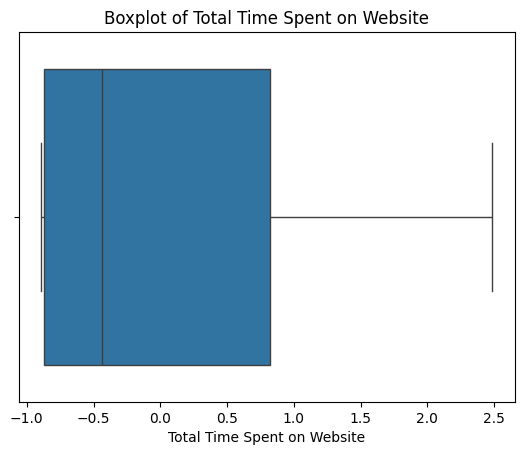

In [ ]:
sns.boxplot(x=df['Total Time Spent on Website'])
plt.title('Boxplot of Total Time Spent on Website')
plt.show()

limit = df['Total Time Spent on Website'].quantile(0.99)
df['Total Time Spent on Website'] = np.where(df['Total Time Spent on Website'] > limit, limit, df['Total Time Spent on Website'])

In [ ]:
cols_to_drop = [
    'Lead Quality',
    'Asymmetrique Activity Index',
    'Asymmetrique Profile Index',
    'Asymmetrique Profile Score',
    'Asymmetrique Activity Score',
]

In [ ]:
cols_to_drop = [
    'Lead Quality',
    'Asymmetrique Activity Index',
    'Asymmetrique Profile Index',
    'Asymmetrique Profile Score',
    'Asymmetrique Activity Score',
]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [ ]:
cat_impute_cols = [
    'Tags',
    'What matters most to you in choosing a course',
    'Lead Profile',
    'What is your current occupation',
    'Country',
    'How did you hear about X Education',
    'Specialization',
    'City'
]

In [ ]:
num_impute_cols = ['Page Views Per Visit', 'TotalVisits']
cat_low_missing = ['Last Activity', 'Lead Source']

In [ ]:
for col in cat_impute_cols + cat_low_missing:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

for col in num_impute_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

print("Remaining missing values:", df.isnull().sum().sum())

Remaining missing values: 0


In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(f"Categorical Columns:\n{cat_cols}")

Categorical Columns:
[]


In [ ]:
binary_map = {'Yes': 1, 'No': 0}
yes_no_cols = [col for col in cat_cols if df[col].dropna().isin(['Yes', 'No']).all()]

for col in yes_no_cols:
    df[col] = df[col].map(binary_map)

In [ ]:
remaining_cat = list(set(cat_cols) - set(yes_no_cols))
df = pd.get_dummies(df, columns=remaining_cat, drop_first=True)

In [ ]:
print("All columns are now numeric:", df.dtypes.value_counts())
df.head()

All columns are now numeric: bool       168
int64       10
float64      3
Name: count, dtype: int64


,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,-0.713593,-0.892982,-1.098699,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
1,0,0,0,0.324018,0.344133,0.066441,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,0,1,-0.298549,1.918977,-0.166587,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,0,0,-0.506071,-0.333160,-0.632643,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
4,0,0,1,-0.298549,1.728087,-0.632643,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
num_cols_to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

scaler = StandardScaler()
df[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])

df[num_cols_to_scale].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9.240000e+03,9.240000e+03,9.240000e+03
mean,6.151885e-18,-3.844928e-18,-1.614870e-17
std,1.000054e+00,1.000054e+00,1.000054e+00
min,-7.135932e-01,-8.929938e-01,-1.098699e+00
25%,-5.060710e-01,-8.709674e-01,-6.326433e-01
50%,-9.102676e-02,-4.377832e-01,-1.665873e-01
75%,3.240175e-01,8.250591e-01,2.994687e-01
max,5.137446e+01,2.484530e+00,2.453438e+01


In [ ]:
y = df['Converted']
x = df.drop('Converted', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test Shape: {X_test.shape}")

Train shape: (7392, 180), Test Shape: (1848, 180)


In [ ]:
X_train.isnull().sum().sort_values(ascending=False).head(10)

,0
Do Not Email,0
Do Not Call,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Search,0
Newspaper Article,0
X Education Forums,0
Newspaper,0
Digital Advertisement,0


In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgp = xgb.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:49:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_rf)


Logistic Regression Results:
Accuracy : 0.9312770562770563
Precision: 0.9232995658465991
Recall: 0.8960674157303371
F1 Score: 0.909479686386315

Confusion Matrix:
[[1083   53]
 [  74  638]]

Random Forest Results:
Accuracy : 0.9301948051948052
Precision: 0.9158345221112696
Recall: 0.901685393258427
F1 Score: 0.9087048832271762

Confusion Matrix:
[[1077   59]
 [  70  642]]

XGBoost Results:
Accuracy : 0.9301948051948052
Precision: 0.9158345221112696
Recall: 0.901685393258427
F1 Score: 0.9087048832271762

Confusion Matrix:
[[1077   59]
 [  70  642]]


In [ ]:
importance = rf. feature_importances_
features = X_train.columns

feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

/tmp/ipython-input-4068109280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='viridis')


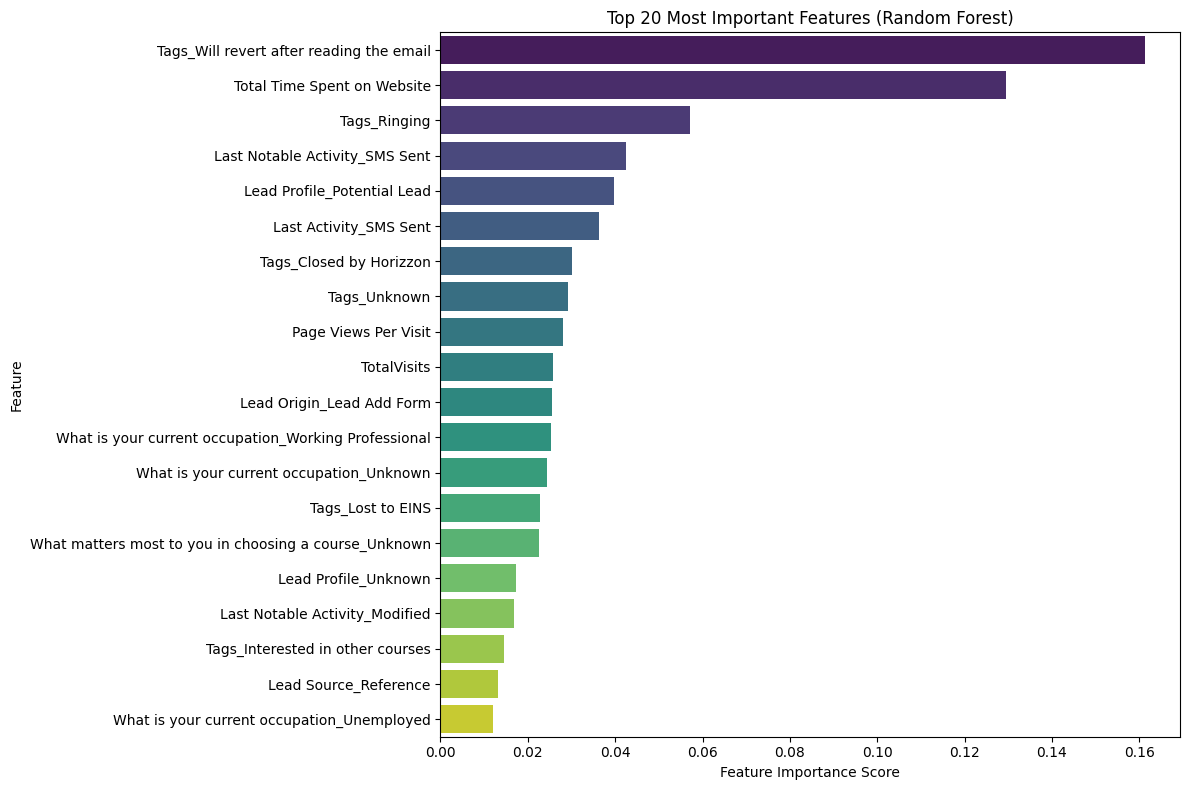

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='viridis')
plt.title('Top 20 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
low_impact = feat_imp_df[feat_imp_df['Importance'] < 0.005]['Feature'].tolist()
X_reduced = X_train.drop(columns=low_impact)

In [ ]:
y = df['Converted']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgp = xgb.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:50:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_rf)


Logistic Regression Results:
Accuracy : 0.9312770562770563
Precision: 0.9232995658465991
Recall: 0.8960674157303371
F1 Score: 0.909479686386315

Confusion Matrix:
[[1083   53]
 [  74  638]]

Random Forest Results:
Accuracy : 0.9301948051948052
Precision: 0.9158345221112696
Recall: 0.901685393258427
F1 Score: 0.9087048832271762

Confusion Matrix:
[[1077   59]
 [  70  642]]

XGBoost Results:
Accuracy : 0.9301948051948052
Precision: 0.9158345221112696
Recall: 0.901685393258427
F1 Score: 0.9087048832271762

Confusion Matrix:
[[1077   59]
 [  70  642]]


In [ ]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': logreg.coef_[0]
})

coefficients = coefficients.sort_values(by='Importance', ascending=False)
print(coefficients.head(10))
print(coefficients.tail(10))

                                            Feature  Importance
148                               Tags_Lost to EINS    6.508184
140                         Tags_Closed by Horizzon    5.892803
158        Tags_Will revert after reading the email    4.919218
156                                    Tags_Unknown    2.701214
57                     Lead Source_Welingak Website    1.544917
133                          Last Activity_SMS Sent    1.286282
139                                       Tags_Busy    1.244090
3                       Total Time Spent on Website    1.064290
147                            Tags_Lateral student    0.872640
171  Last Notable Activity_Had a Phone Conversation    0.844793
                                               Feature  Importance
150                   Tags_Not doing further education   -1.206222
146                   Tags_Interested in other courses   -1.262361
144                  Tags_Interested  in full time MBA   -1.386466
36   What matters most to yo

In [ ]:
leakage_cols = [col for col in df.columns if 'Tags' in col or 'Lead Qaulity' in col]
df_clean = df.drop(columns=leakage_cols)
print(f"Dropped {len(leakage_cols)} leakage columns.")

Dropped 26 leakage columns.


In [ ]:
x = df_clean.drop('Converted', axis=1)
y = df_clean['Converted']

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgp = xgb.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:10:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_rf)


Logistic Regression Results:
Accuracy : 0.8221500721500722
Precision: 0.7777777777777778
Recall: 0.7537453183520599
F1 Score: 0.7655729909652876

Confusion Matrix:
[[1474  230]
 [ 263  805]]

Random Forest Results:
Accuracy : 0.8207070707070707
Precision: 0.7779941577409932
Recall: 0.74812734082397
F1 Score: 0.7627684964200477

Confusion Matrix:
[[1476  228]
 [ 269  799]]

XGBoost Results:
Accuracy : 0.8207070707070707
Precision: 0.7779941577409932
Recall: 0.74812734082397
F1 Score: 0.7627684964200477

Confusion Matrix:
[[1476  228]
 [ 269  799]]


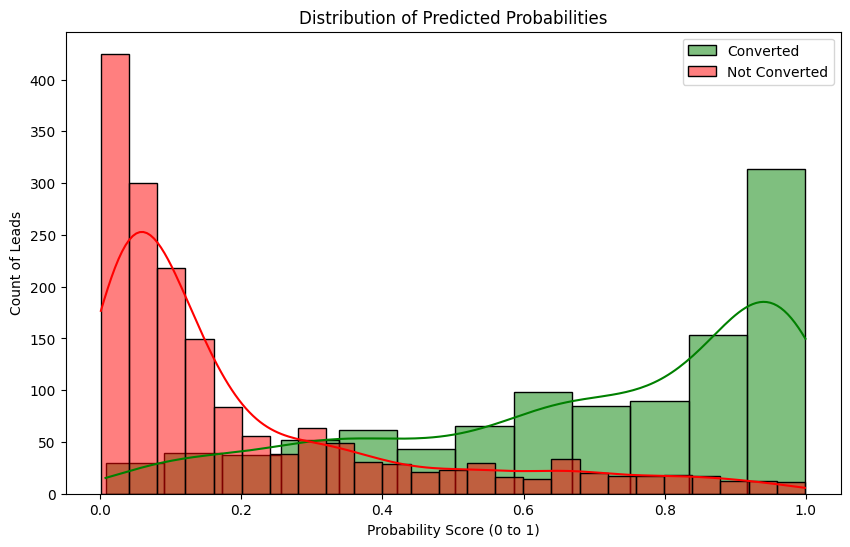

In [ ]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10,6))
sns.histplot(y_pred_probs[y_test==1], color='green', alpha=0.5, label='Converted', kde=True)
sns.histplot(y_pred_probs[y_test==0], color='red', alpha=0.5, label='Not Converted', kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability Score (0 to 1)')
plt.ylabel('Count of Leads')
plt.legend()
plt.show()

In [ ]:
coefficients =pd.DataFrame({
    'Feature': X_train.columns, 'Importance': logreg.coef_[0]
})
coefficients = coefficients.sort_values(by='Importance', ascending=False)
print(coefficients.head(5))

                                               Feature  Importance
57                        Lead Source_Welingak Website    2.259495
31                           Lead Origin_Lead Add Form    1.670187
121  What is your current occupation_Working Profes...    1.385386
116          What is your current occupation_Housewife    1.379966
113                                    Country_Unknown    1.169126


In [ ]:
import joblib

# joblib.dump(logreg, "lead_scoring_model.pkl")
# joblib.dump(X_reduced.columns.tolist(), "model_features.pkl")

['model_features.pkl']

In [ ]:
X = pd.get_dummies(df.drop("Converted", axis=1))
y = df["Converted"]

# Save feature names
joblib.dump(X.columns.tolist(), "model_features.pkl")

['model_features.pkl']

In [ ]:
xgb.fit(X, y)
joblib.dump(xgb, "lead_scoring_model.pkl")

['lead_scoring_model.pkl']

In [ ]:
# model_features = joblib.load("model_features.pkl")
# sample = pd.DataFrame(columns=model_features)
# sample.loc[0] = [0] * len(model_features)
# sample.to_csv("sample_leads.csv", index=False)

In [ ]:
from google.colab import files

files.download("lead_scoring_model.pkl")
files.download("model_features.pkl")
# files.download("sample_leads.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>